# DAT200 CA4 2023

Kaggle username: andrinezimmermann

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

### Reading data

In [2]:
# Loading the train dataset
liver_df = pd.read_csv('./data/train.csv', sep=',', index_col=0)
liver_df.shape

# Loading the test dataset
test_df = pd.read_csv('./data/test.csv', sep=',', index_col=0)

### Data exploration and visualisation

In [3]:
# Descriptive stats
describe_stats = liver_df.describe()
describe_stats

N_Days          Age   Bilirubin  Cholesterol     Albumin  \
count   200.000000    200.00000  200.000000   184.000000  200.000000   
mean   2022.685000  18453.91000    3.502000   446.597283    4.191950   
std    1150.021418   4057.47015    5.024642   294.467793    0.950893   
min      51.000000   9598.00000    0.300000   101.600000    2.112000   
25%    1216.000000  15542.50000    0.800000   282.900000    3.432000   
50%    1860.500000  18467.00000    1.400000   372.900000    4.338000   
75%    2809.500000  21028.00000    3.525000   507.375000    4.920000   
max    4523.000000  28018.00000   28.000000  2054.400000    6.120000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count  199.000000    200.000000  200.000000     184.000000  196.000000   
mean   121.970854   2705.587800  144.491425     155.116304  310.597449   
std    125.321389   3034.764166   73.438659      99.842222  115.841306   
min      3.200000    301.600000   34.056000      35.200000  106.500000   
25%     41.200000    995.325000   92.535000      92.550000  223.500000   
50%     82.800000   1561.800000  131.100000     135.750000  292.650000   
75%    154.500000   3027.000000  182.745000     189.300000  385.650000   
max    882.000000  16569.900000  420.825000     897.000000  844.500000   

       Prothrombin      Stage  
count   200.000000  200.00000  
mean     13.016350    3.06500  
std       3.483828    0.84519  
min       6.720000    1.00000  
25%      11.400000    3.00000  
50%      12.720000    3.00000  
75%      15.787500    4.00000  
max      22.800000    4.00000

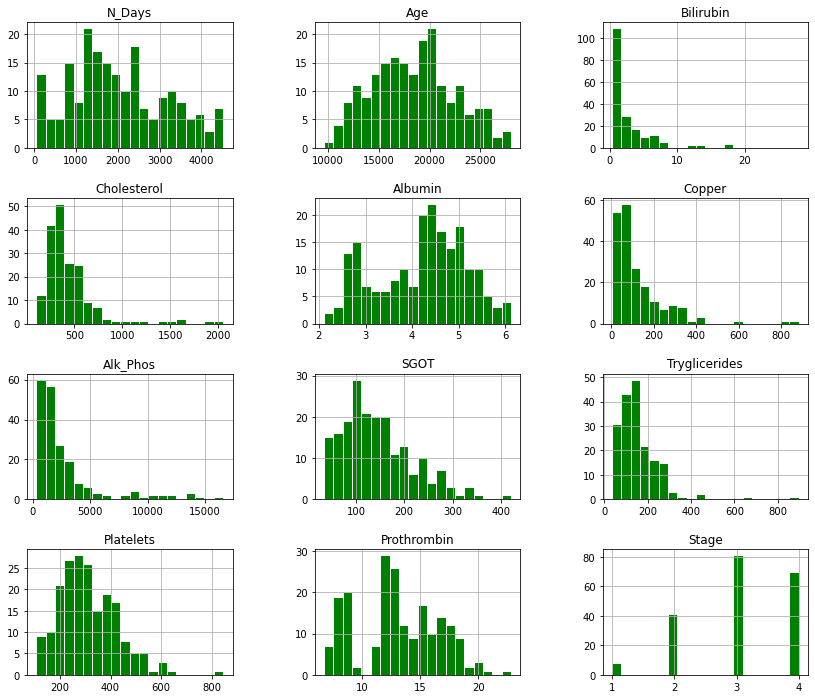

In [4]:
# Histogram for each feature
liver_df.hist(bins=20, figsize=(14,12), color='green', edgecolor='white')
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

None of the features are obviously normally distributed. The features that went from categorical to numerical have less poles than the others. 

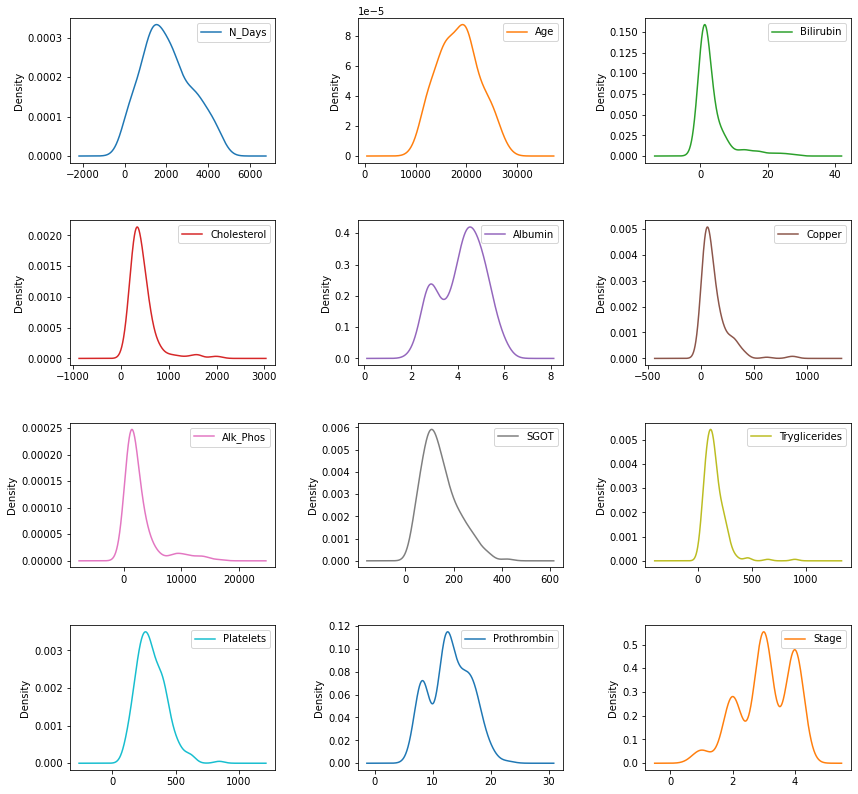

In [5]:
# Desity plot for each feature
liver_df.plot.density(subplots=True, figsize=(14,25), layout=(7,3), sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

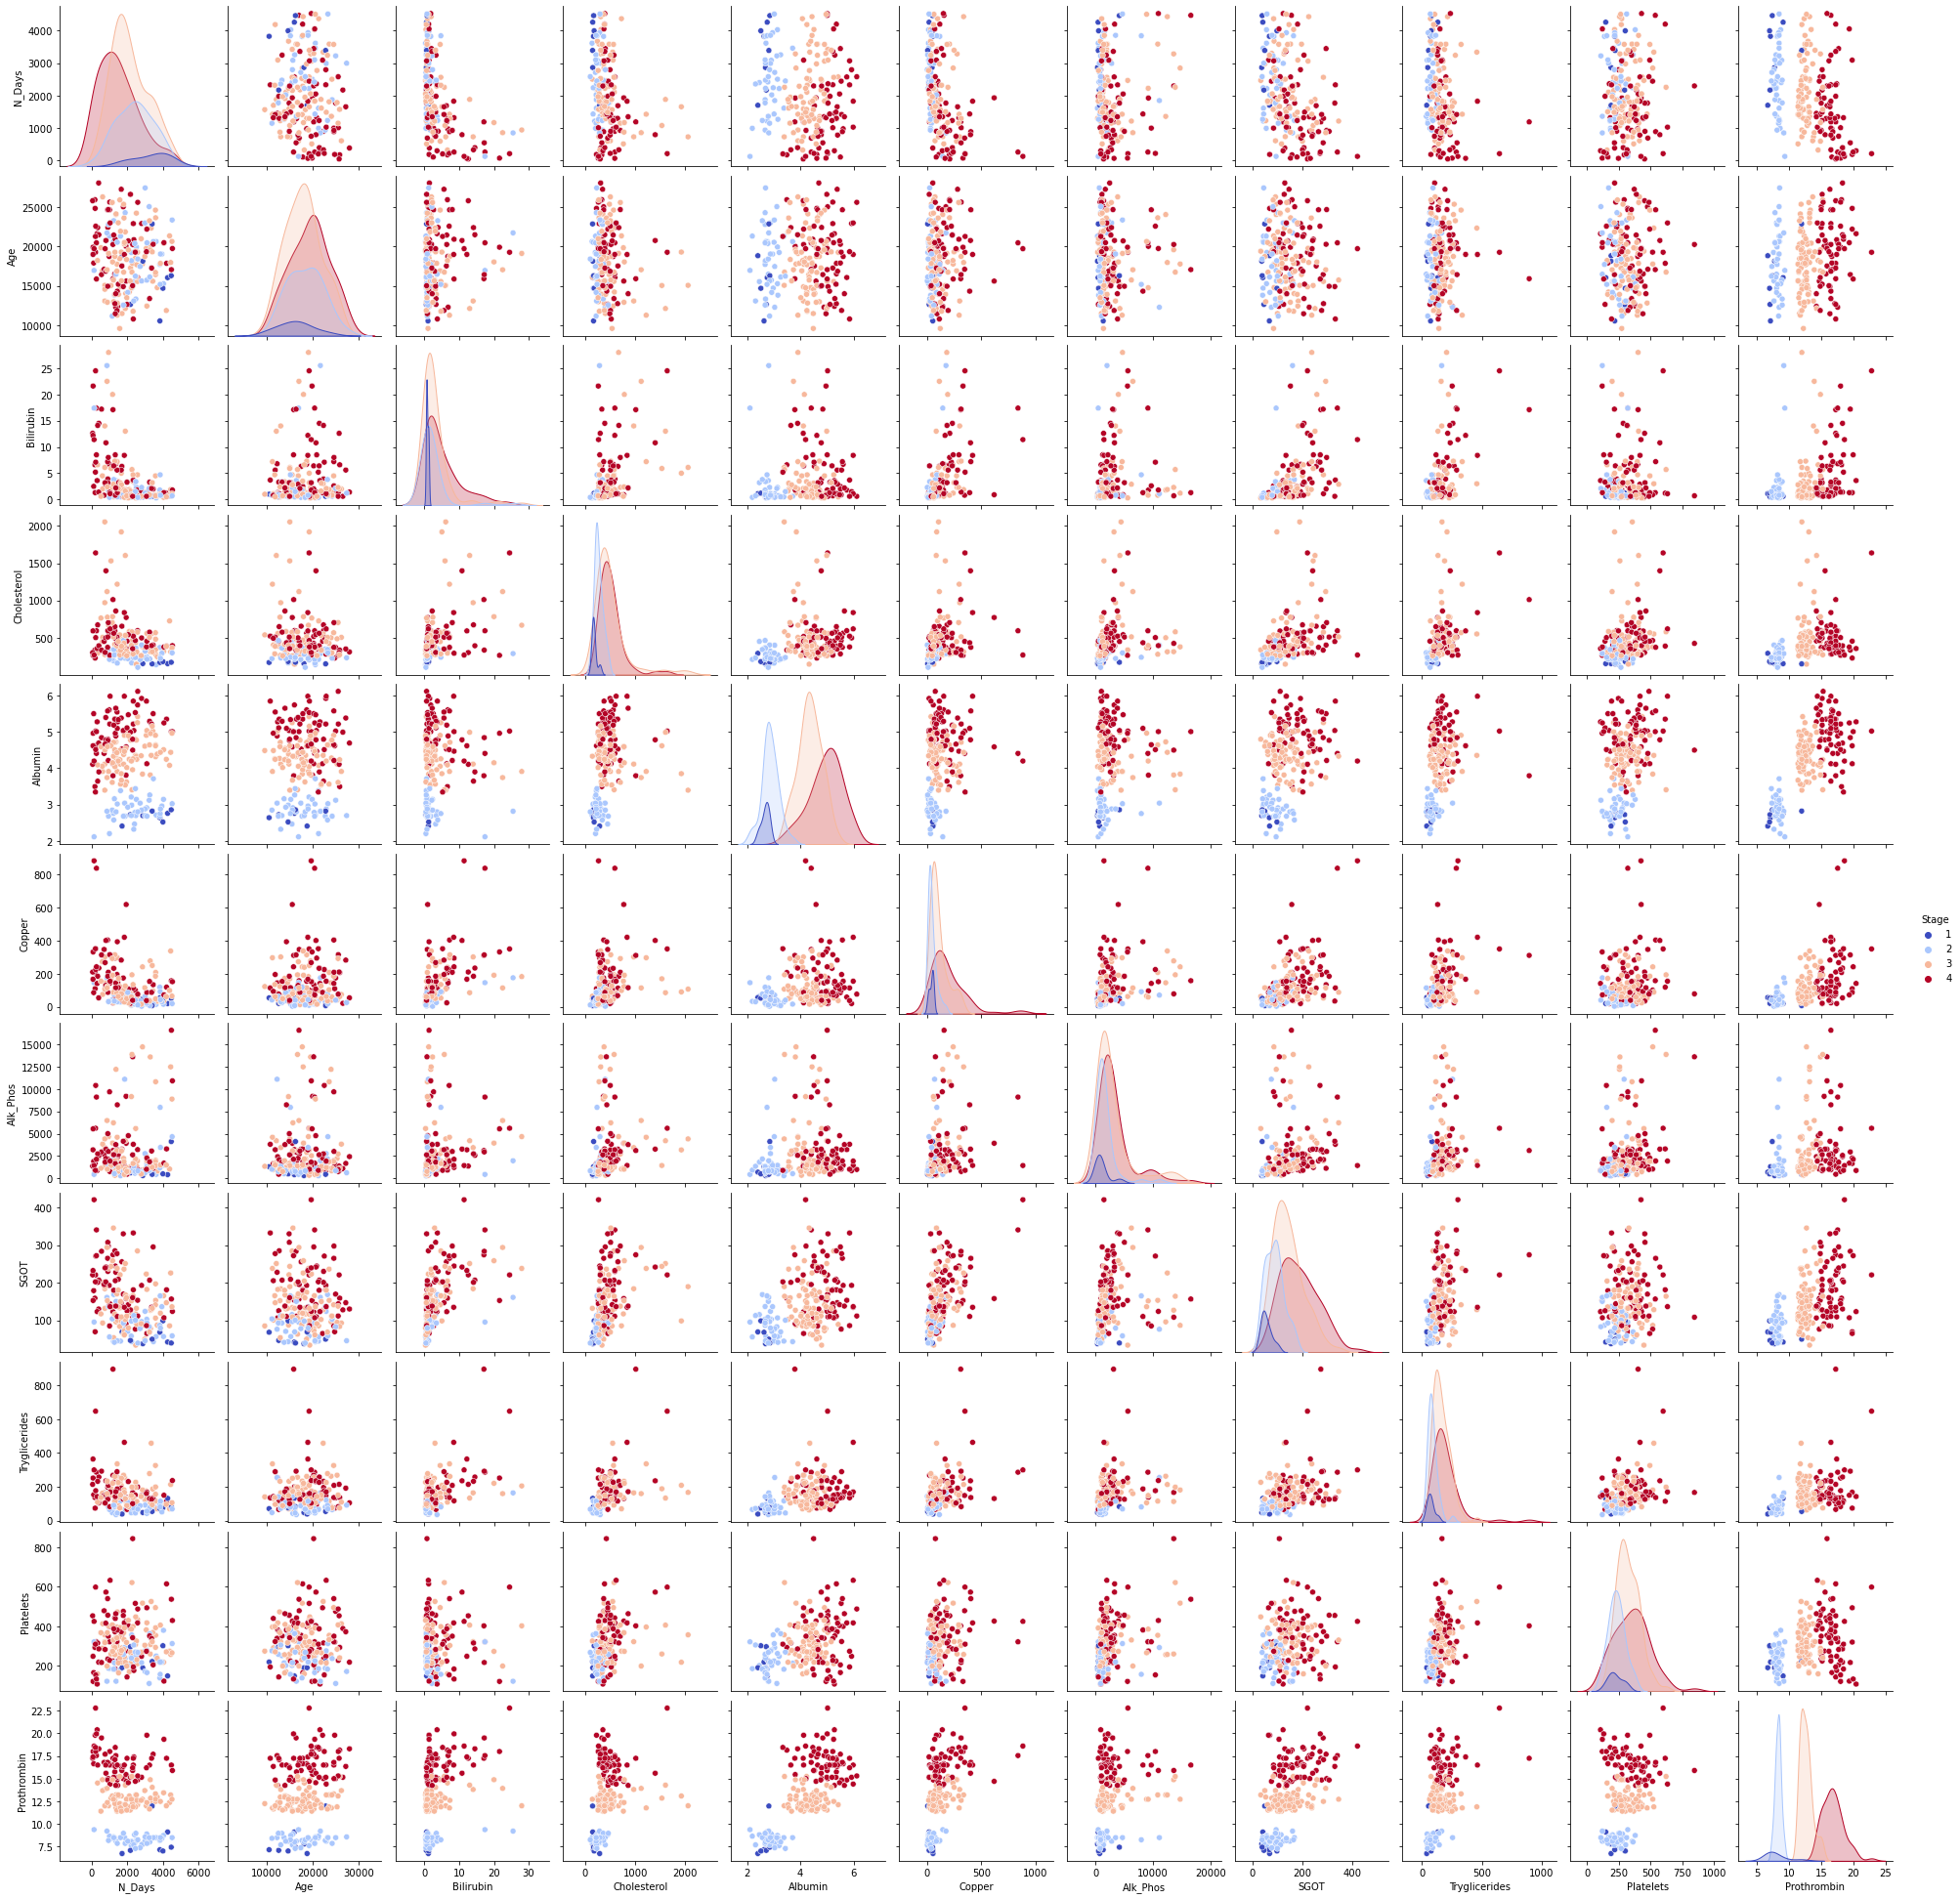

In [6]:
# Pairplot with seaborn
sns.pairplot(liver_df, hue='Stage', palette="coolwarm")
plt.show()

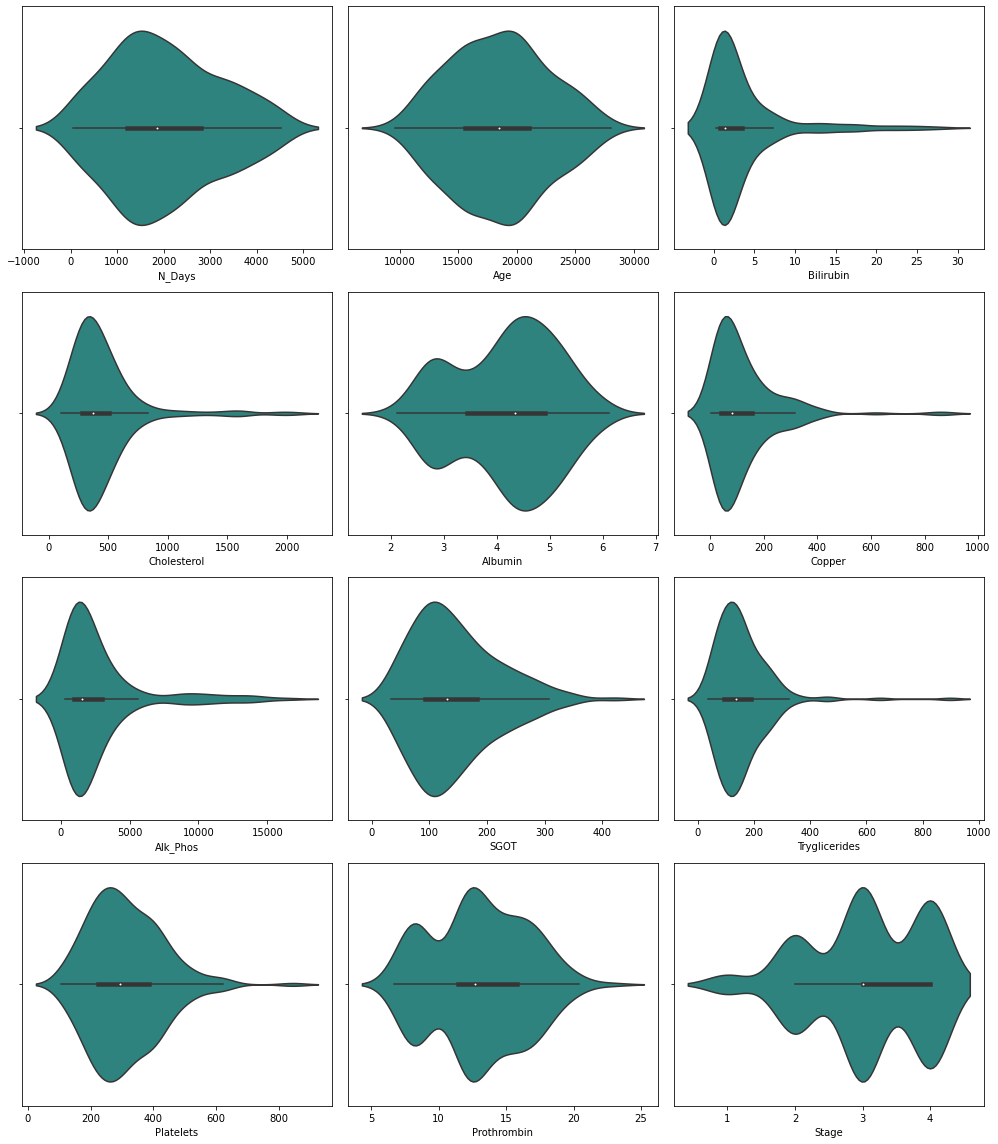

In [7]:
# Select numeric columns
numeric_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 
                'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 16))

# Flatten axes to iterate over them
axes = axes.flatten()

# Create a violin plot for each numeric feature
for i, col in enumerate(numeric_cols):
    sns.violinplot(x=col, data=liver_df, ax=axes[i], palette='viridis')

# Remove any unused axes
for ax in axes[len(numeric_cols):]:
    ax.remove()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

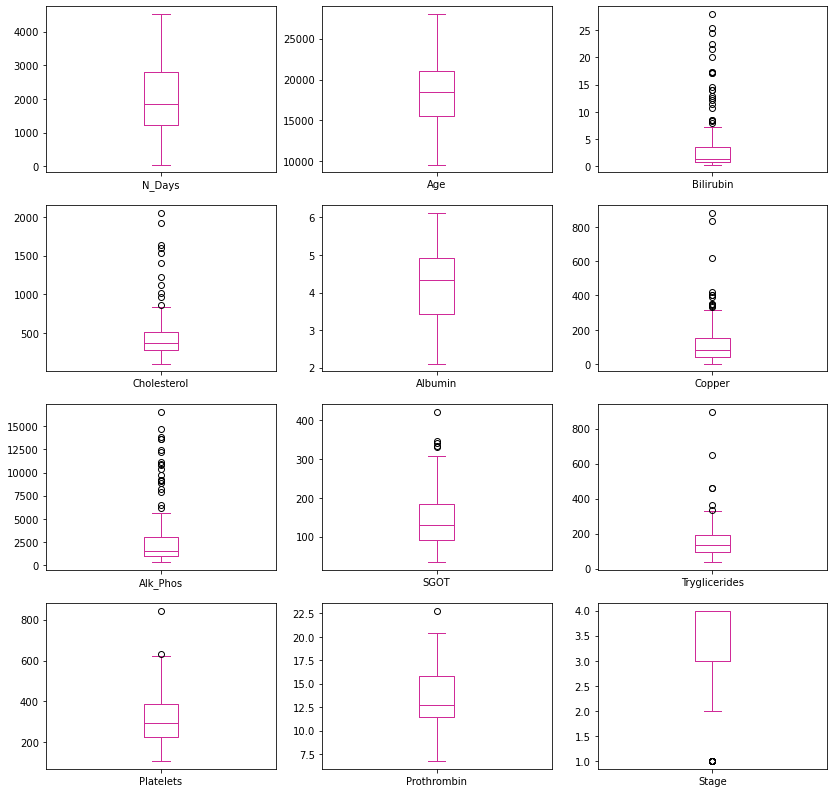

In [8]:
# Boxplots for all features
liver_df.plot.box(subplots=True, figsize=(14,25), layout=(7, 3), sharex=False, sharey=False, color='#d02b98')
plt.show()

The boxplots show that there are outliers for several features. 

### Data cleaning

In [9]:
liver_df.isna().sum()

N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      16
Albumin           0
Copper            1
Alk_Phos          0
SGOT              0
Tryglicerides    16
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

Can see that there are 36 missing values in total. Since this is a small dataset with few samples, I will not be removing any rows. Instead I will be replacing the missing values with the mean of that specific feature. 

In [10]:
copy_df = liver_df.copy()
copy_df = copy_df.fillna(copy_df.mean())

#Checking if there are any missing values left. 
copy_df.isna().sum()

C:\Users\andri\AppData\Local\Temp\ipykernel_10844\1296992287.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  copy_df = copy_df.fillna(copy_df.mean())


N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [11]:
# Cleaning the test data
test_df = test_df.fillna(test_df.mean())
test_df.isna().sum()

C:\Users\andri\AppData\Local\Temp\ipykernel_10844\3196177565.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_df = test_df.fillna(test_df.mean())


N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
dtype: int64

In [12]:
# Removing outliers
z_score = np.abs((copy_df - copy_df.mean()) / copy_df.std()) # Find z-score of  columns 
threshold = 3

# Finding outliers that are bigger than the threshold
outlier = (z_score > threshold).any(axis=1)
outliers = copy_df[outlier] 

# Removing outliers
df = copy_df.drop(outliers.index) 

df.shape 

C:\Users\andri\AppData\Local\Temp\ipykernel_10844\3535497829.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_score = np.abs((copy_df - copy_df.mean()) / copy_df.std()) # Find z-score of  columns


(176, 19)

24 outliers were removed. 

### Data exploration after cleaning

In [13]:
# Descriptive stats
describe_stats = df.describe()
describe_stats

N_Days           Age   Bilirubin  Cholesterol     Albumin  \
count   176.000000    176.000000  176.000000   176.000000  176.000000   
mean   2071.897727  18451.079545    2.525000   392.516246    4.176438   
std    1129.251884   4218.786095    3.126961   158.276059    0.982431   
min      51.000000   9598.000000    0.300000   101.600000    2.112000   
25%    1294.500000  15192.750000    0.700000   282.900000    3.250000   
50%    1916.500000  18414.000000    1.250000   375.750000    4.332000   
75%    2891.250000  21301.500000    3.125000   457.500000    4.958250   
max    4523.000000  28018.000000   17.400000  1218.000000    6.120000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count  176.000000    176.000000  176.000000     176.000000  176.000000   
mean   100.075403   2150.015909  137.080506     139.858208  299.934033   
std     85.592605   2144.280142   68.943293      64.015943  100.030854   
min      3.200000    301.600000   34.056000      35.200000  106.500000   
25%     38.625000    961.800000   87.265000      91.000000  222.925000   
50%     71.200000   1373.700000  123.532500     135.000000  292.250000   
75%    130.125000   2465.250000  179.268750     162.600000  367.500000   
max    403.500000  11089.920000  345.600000     364.500000  633.000000   

       Prothrombin       Stage  
count   176.000000  176.000000  
mean     12.764489    3.022727  
std       3.496435    0.868197  
min       6.720000    1.000000  
25%       8.960000    2.000000  
50%      12.600000    3.000000  
75%      15.337500    4.000000  
max      20.400000    4.000000

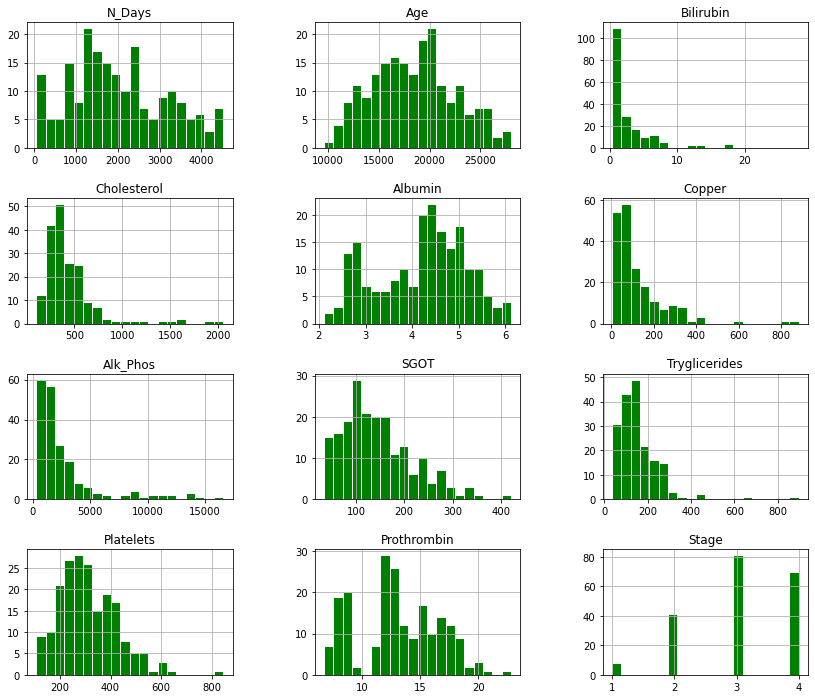

In [14]:
# Histogram for each feature
liver_df.hist(bins=20, figsize=(14,12), color='green', edgecolor='white')
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

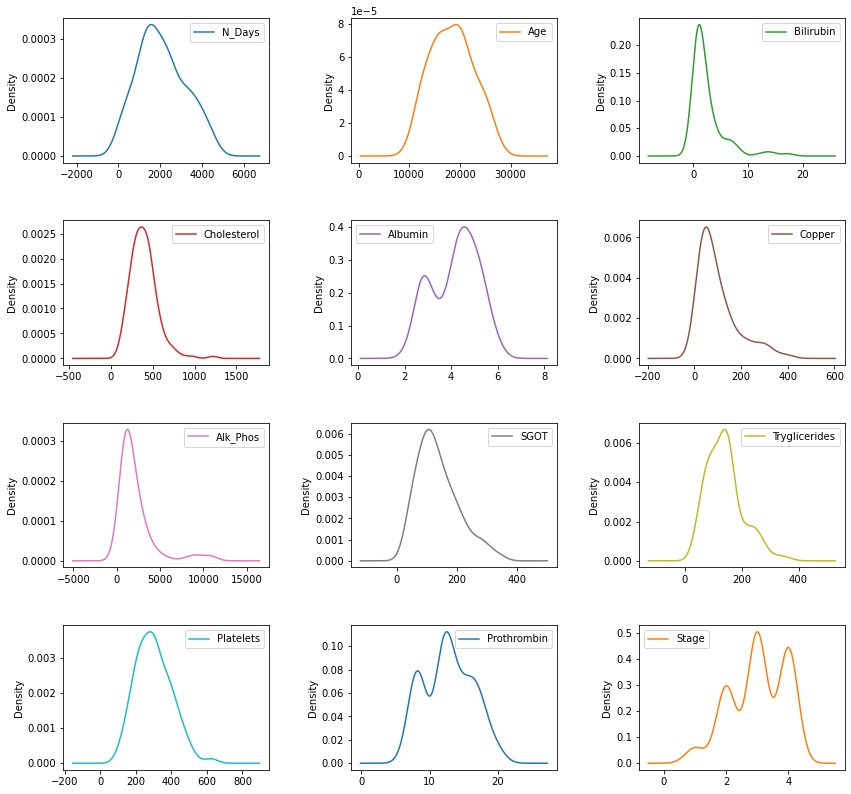

In [15]:
# Desity plot for each feature
df.plot.density(subplots=True, figsize=(14,25), layout=(7,3), sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

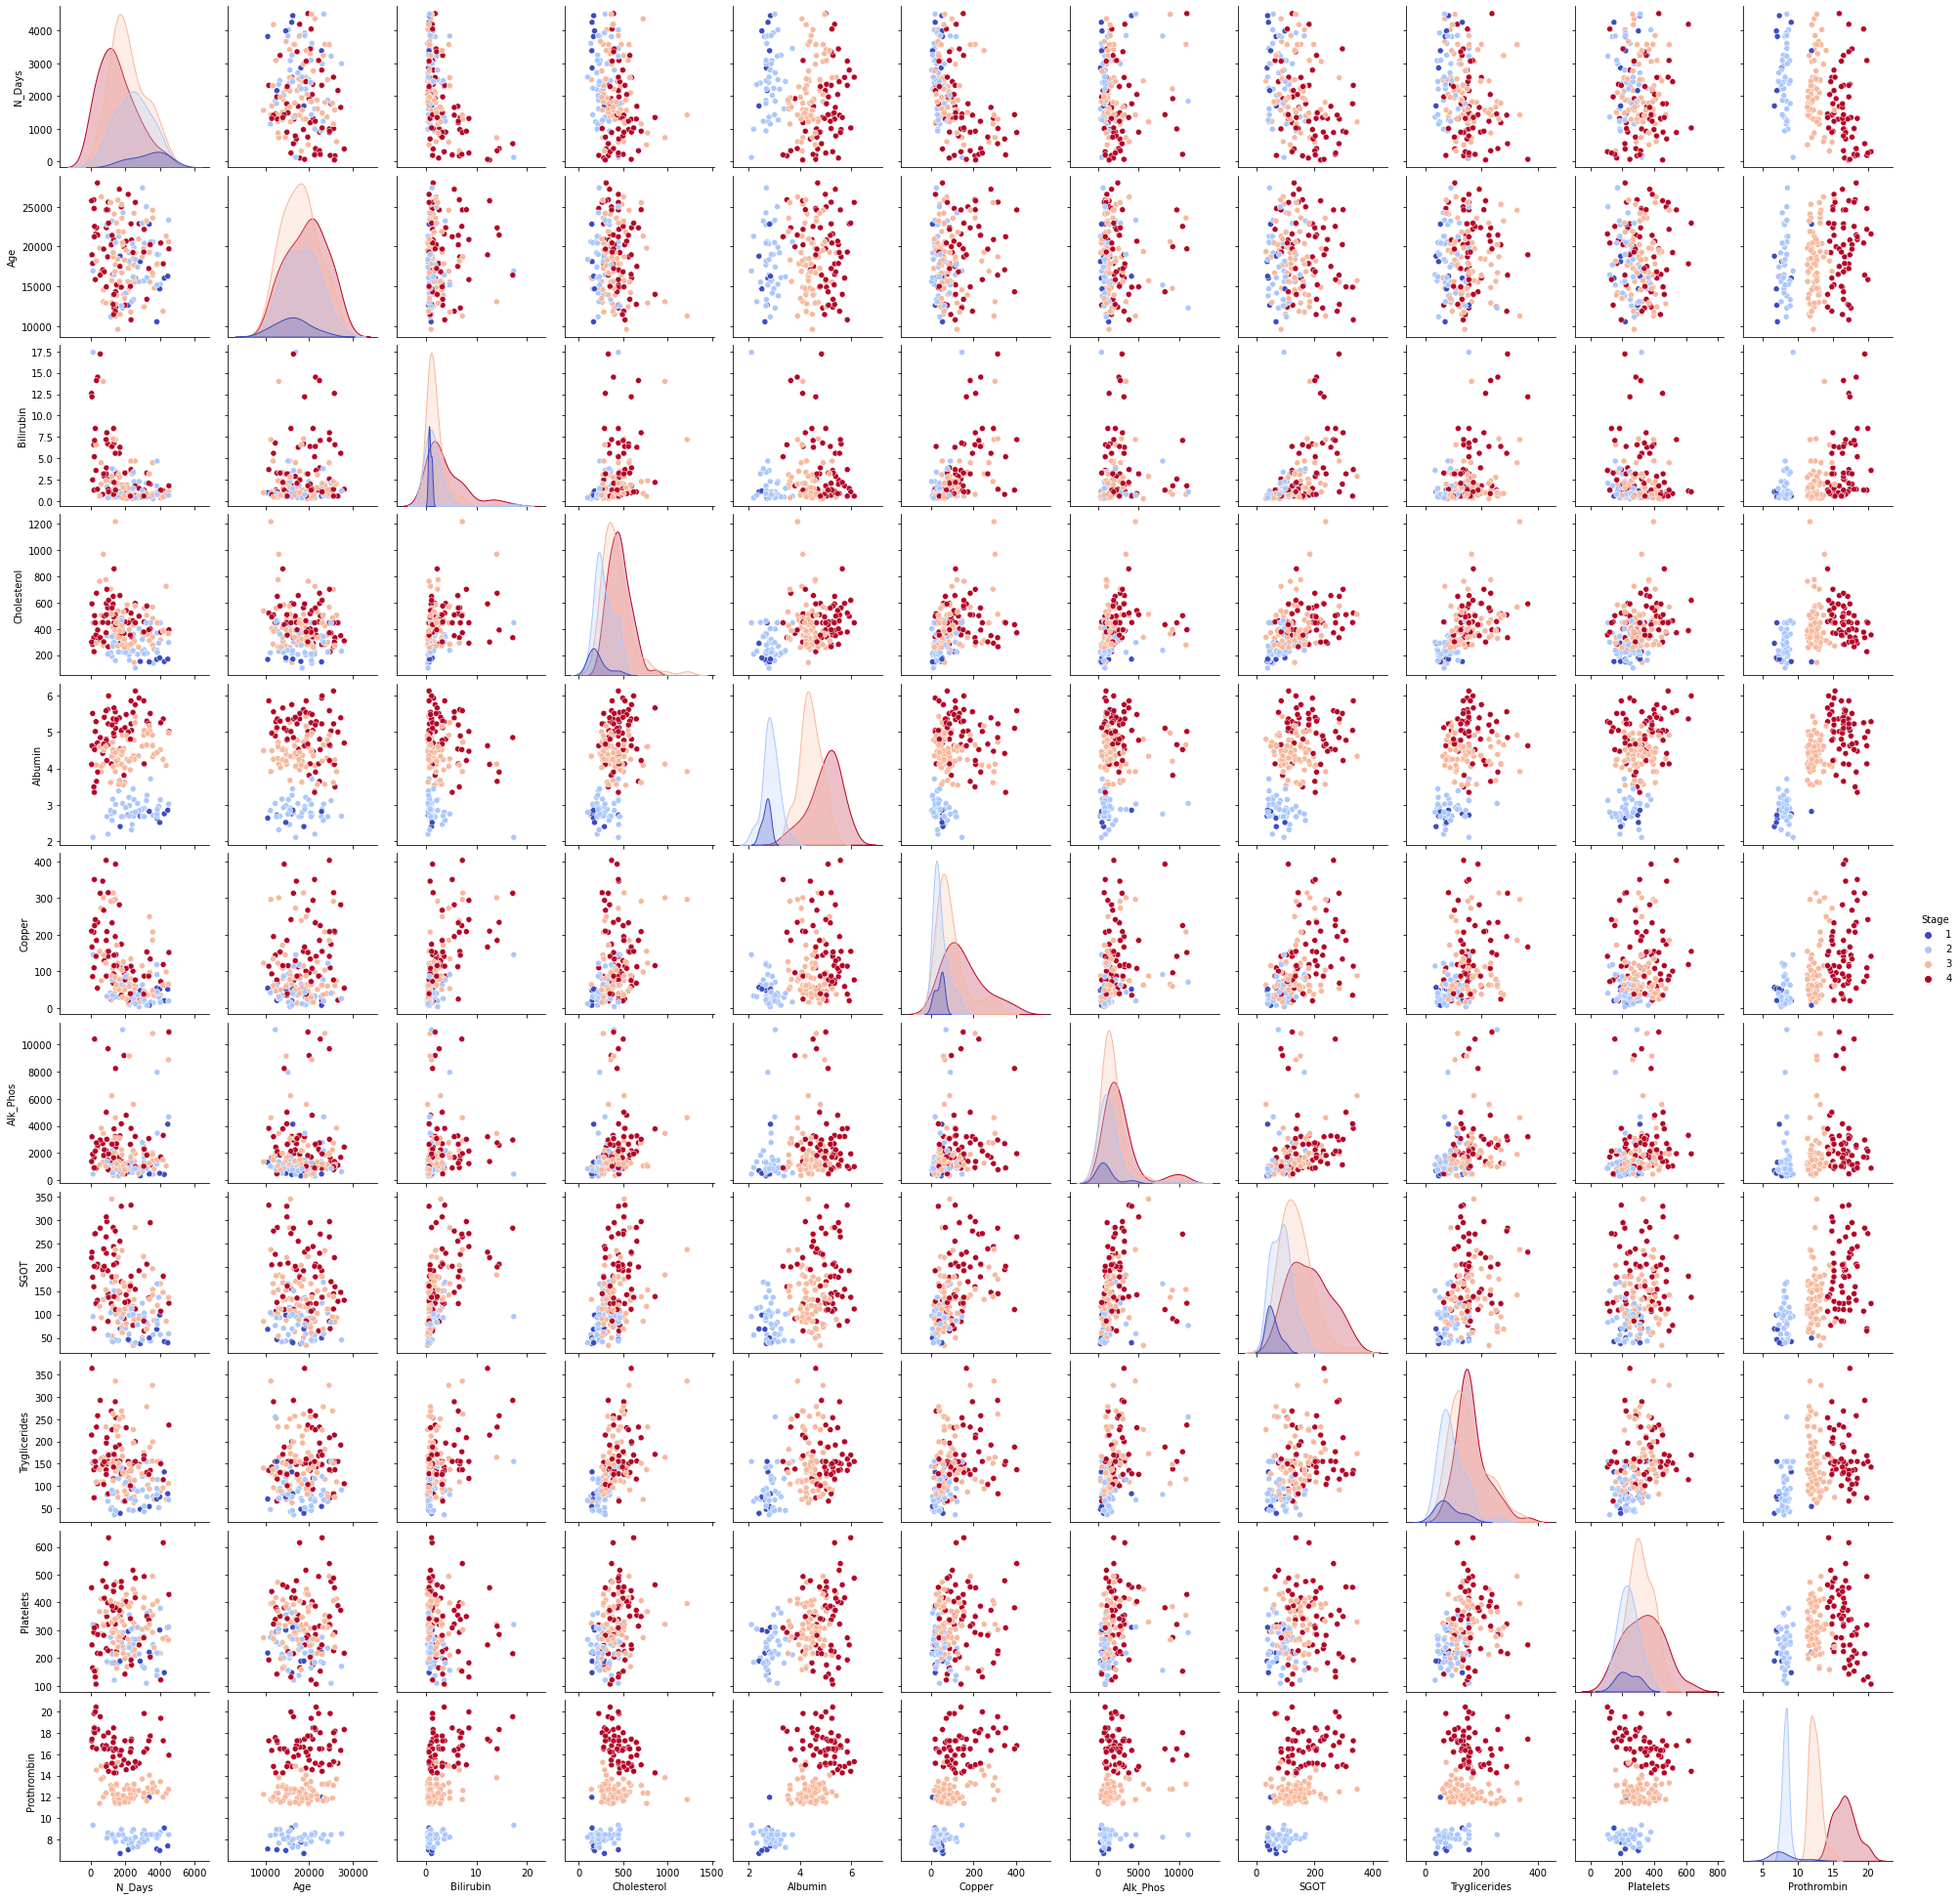

In [16]:
# Pairplot with seaborn
sns.pairplot(df, hue='Stage', palette="coolwarm")
plt.show()

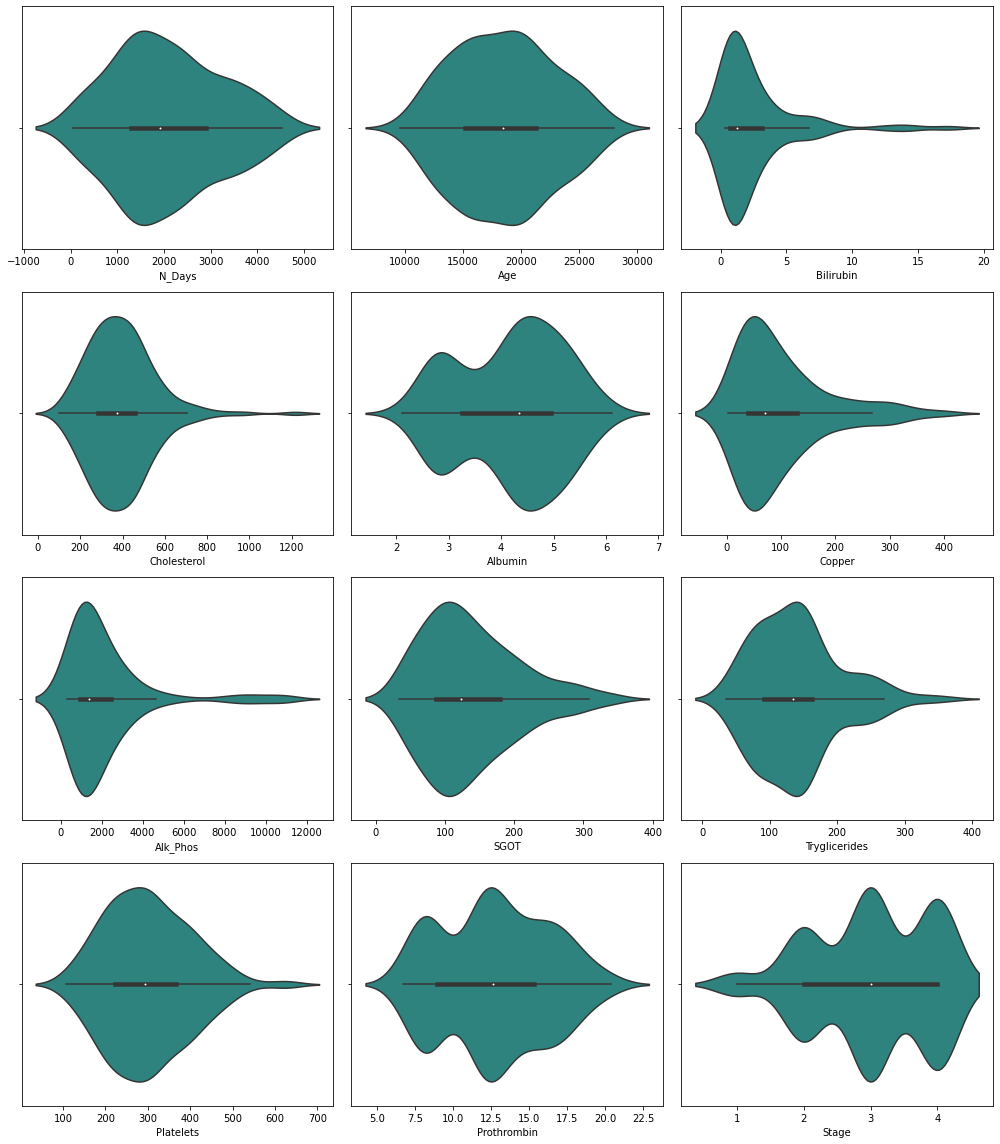

In [17]:
# Select numeric columns
numeric_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 
                'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 16))

# Flatten axes to iterate over them
axes = axes.flatten()

# Create a violin plot for each numeric feature
for i, col in enumerate(numeric_cols):
    sns.violinplot(x=col, data=df, ax=axes[i], palette='viridis')

# Remove any unused axes
for ax in axes[len(numeric_cols):]:
    ax.remove()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

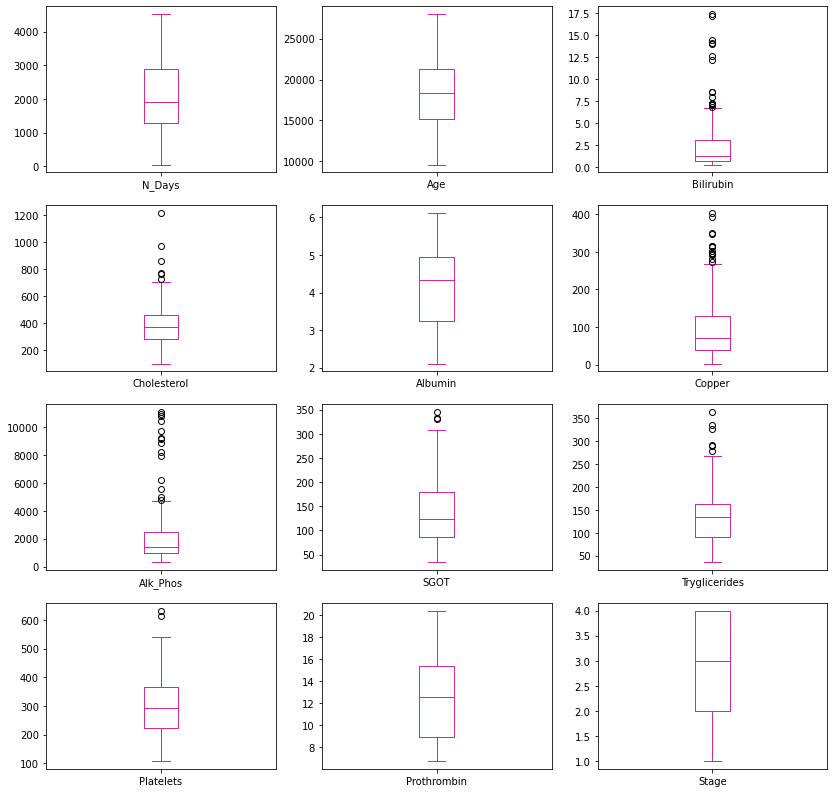

In [18]:
# Boxplots for all features
df.plot.box(subplots=True, figsize=(14,25), layout=(7, 3), sharex=False, sharey=False, color='#d02b98')
plt.show()

### Data preprocessing

In [19]:
# Selecting features
X = df.iloc[:, :-1] # data
y = df.iloc[:, -1]  # target

# Removing the 'Spiders' column, as it is the target variable.
X = X.drop(columns=["Spiders"]) 
test_df = test_df.drop(columns=["Spiders"])

# Transforming categorical variables to dummy variables using one-hot encoding.
X = pd.get_dummies(X, columns=["Status", "Drug", "Sex", "Ascites", "Hepatomegaly", "Edema"])
test_df = pd.get_dummies(test_df, columns=["Status", "Drug", "Sex", "Ascites", "Hepatomegaly", "Edema"])

In [20]:
print(df.columns)

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')


#### Train test split

In [21]:
# Splitting the data into train and test sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

#### Scaling

In [22]:
sc = StandardScaler()
sc.fit(X_train)

# Scale X_train and then scale X_test with parameters (mean & std) of X_train
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

### Modelling

#### Data pipeline with kernel

In [23]:
# Define the pipeline (scaling and classification method):
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))

# Define ranges of parameter values:
param_range  = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0] # For regularization parameter C.
param_range2 = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]         # For scaling parameter gamma og rbf-kernel.

# Define the grid of parameter values to be searched:
param_grid   = [{'svc__C': param_range, 'svc__kernel': ['linear']},
                {'svc__C': param_range, 'svc__gamma': param_range2, 'svc__kernel': ['rbf']}]

# Perform grid search using the pipeline and parameter grid:
gs_kernal = GridSearchCV(estimator=pipe_svc, 
                         param_grid=param_grid, 
                         scoring='accuracy', 
                         cv=5,
                         n_jobs=-1)

gs_kernal = gs_kernal.fit(X_train, y_train)

# Print the best score and corresponding parameters found by the grid search:
print(f'Best score: %.3f' % gs_kernal.best_score_)
print(gs_kernal.best_params_)

Best score: 0.950
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [24]:
# Build classifier based on all training samples using the "optimal parameters"
clf = gs_kernal.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))
print('Test accuracy: %.3f' % gs_kernal.score(X_test, y_test))

Test accuracy: 0.944
Test accuracy: 0.944


#### Data pipeline with regularization

In [25]:
# Define a pipeline with StandardScaler and Logistic Regression with L2 regularization
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(solver = 'lbfgs', max_iter = 200, 
                                           penalty = 'l2', multi_class = 'auto', random_state = 1))  

# Define the grid of hyperparameters to search over
grid_lr = [{'logisticregression__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0]}]

# Use GridSearchCV to search over hyperparameters for the logistic regression model
gs_lr = GridSearchCV(estimator=pipe_lr,  # Use the pipeline as the estimator
                     param_grid=grid_lr, # Search over the hyperparameters defined in the list of dictionaries
                     scoring='accuracy', # Use accuracy as the scoring metric
                     cv=4,               # Perform 4-fold cross-validation
                     refit=True,         # Refit the best estimator with the entire dataset
                     n_jobs=1)           # Use one processor for parallelization

# Fit the grid search object on the training data
gs_lr = gs_lr.fit(X_train, y_train)

# Print the best score and best set of hyperparameters
print(f'Training score of best model: {gs_lr.best_score_:.3f}')
print(f'Best parameters: {gs_lr.best_params_}')

# Get the best estimator from the grid search object and compute the test accuracy
clf_lr = gs_lr.best_estimator_
print(f'Test accuracy: {clf_lr.score(X_test, y_test):.3f}')

Training score of best model: 0.943
Best parameters: {'logisticregression__C': 1.0}
Test accuracy: 0.917


#### Other models used for Kaggle submission

Random forest classifier:

In [26]:
# create the pipeline using make_pipeline
pipeline = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(n_estimators=90, criterion='gini',
                          random_state=40)
)

# fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# create a parameter grid to search over
#param_grid = {
#    'randomforestclassifier__n_estimators': [50, 100, 150],
#    'randomforestclassifier__max_depth': [None, 5, 10],
#    'randomforestclassifier__max_features': ['sqrt', 'log2']
#}

param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 150, 200, 250],
    'randomforestclassifier__max_depth': [2, 3, 4, 8, 16],
    'randomforestclassifier__max_features': ['sqrt', 'log2']
}

# create a grid search object with 5-fold cross-validation
grid_search_rf = GridSearchCV(pipeline, 
                              param_grid=param_grid, 
                              cv=3, 
                              refit=True,
                              n_jobs=-1)

# fit the grid search object on the training data
grid_search_rf.fit(X_train, y_train)

# print the best hyperparameters and the corresponding score
print('Best hyperparameters:', grid_search_rf.best_params_)
print('Best score:', grid_search_rf.best_score_)

test_accuracy = pipeline.score(X_test, y_test)
print('Test accuracy:', test_accuracy)

Best hyperparameters: {'randomforestclassifier__max_depth': 16, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__n_estimators': 150}
Best score: 0.9571384520505705
Test accuracy: 0.9444444444444444


K-nearest neighbors classifier:

In [27]:
# Define a pipeline with StandardScaler, LDA, and KNeighborsClassifier
pipe_knn = Pipeline([('scaler', StandardScaler()), 
                     ('lda', LDA()), 
                     ('knn', KNeighborsClassifier())])

# Define a dictionary of hyperparameters to search over
param_grid_knn = {'knn__n_neighbors': np.arange(2, 41, 2),
                  'knn__leaf_size': np.arange(10, 41, 10),
                  'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                  'knn__weights': ['uniform', 'distance'],
                  'knn__p': [1, 2], # L1/L2
                  }

# Use GridSearchCV to search over hyperparameters for the KNeighborsClassifier
grid_knn = GridSearchCV(estimator=pipe_knn,        # Use the pipeline as the estimator
                        param_grid=param_grid_knn, # Search over the hyperparameters defined in the dictionary
                        scoring='accuracy',        # Use accuracy as the scoring metric
                        cv=3,                      # Perform 3-fold cross-validation
                        n_jobs=-1)                 # Use all available processors for parallelization

# Fit the grid search object on the training data
grid_knn.fit(X_train, y_train)

# Print the best score and best set of hyperparameters
print(grid_knn.best_score_)
print(grid_knn.best_params_)

0.9571384520505705
{'knn__leaf_size': 10, 'knn__metric': 'euclidean', 'knn__n_neighbors': 4, 'knn__p': 1, 'knn__weights': 'distance'}


### Final Evaluation and confusion matrix

After trial and error I found that the KNN pipeline gave the best results. 

In [28]:
knn_df = grid_knn.best_estimator_.fit(X_train, y_train)

y_predict = knn_df.predict(test_df)
y_predict

array([3, 4, 3, 2, 3, 4, 4, 2, 3, 2, 4, 2, 4, 3, 2, 4, 2, 4, 4, 2, 3, 4,
       4, 4, 3, 4, 4, 2, 3, 3, 2, 1, 4, 3, 4, 2, 3, 2, 3, 3, 4, 3, 2, 3,
       2, 3, 4, 3, 4, 4, 4, 3, 2, 1, 4, 2, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4,
       2, 3, 2, 1, 3, 2, 2, 2, 1, 2, 4, 2, 3, 3, 4, 4, 4, 4, 1, 2, 1, 3,
       3, 4, 4, 2, 2, 3, 4, 4, 4, 3, 4, 4, 2, 3, 3, 3, 4, 4, 2, 4, 2],
      dtype=int64)

### Kaggle submission

In [29]:
#datafr = pd.DataFrame(y_predict)
submit = pd.DataFrame({'index':test_df.index, 'Stage': y_predict})
submit.to_csv('submit1.csv', index=False)

#### ROC Curve for binary classificaion problem